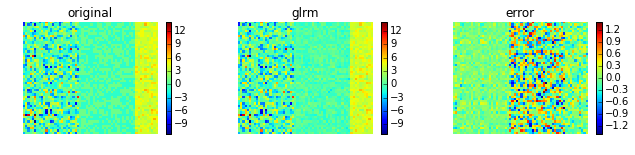

19.7003570219


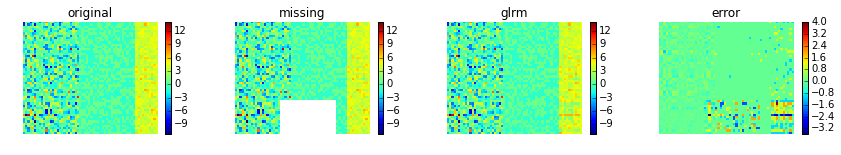

24.5227001195


In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
from glrm.loss import QuadraticLoss, HingeLoss, OrdinalLoss
from glrm.reg import QuadraticReg
from glrm import GLRM
from glrm.convergence import Convergence
from glrm.util import pplot, unroll_missing
from numpy.random import randn, choice, seed
from itertools import product
from numpy import sign, ceil, hstack
seed(1)

# Generate problem data
m, k = 50, 10
n1 = 25 # cols of numerical data
n2 = 10 # cols of ordinal data
n3 = 25 # cols of boolean data
n = n1+n2+n3
data = randn(m,k).dot(randn(k,n))
data_real = data[:,:n1] # numerical data
data_ord = data[:,n1:n1+n2] 
data_ord = data_ord - data_ord.min()
data_ord = (data_ord/data_ord.max()*6 + 1).round()# ordinal data, e.g., Likert scale
data_bool = sign(data[:,n1+n2:])

# Initialize model
A = [data_real, data_bool, data_ord]
loss = [QuadraticLoss, OrdinalLoss, HingeLoss]
regX, regY = QuadraticReg(0.01), QuadraticReg(0.01)
converge = Convergence(TOL = 1e-2, max_iters = 1000) # optional (default TOL = 1e-3)
glrm_mix = GLRM(A, [QuadraticLoss, QuadraticLoss, QuadraticLoss], regX, regY, k, converge = converge)

# Fit
glrm_mix.fit()

# Results
X, Y = glrm_mix.factors()
A_hat = glrm_mix.predict() # glrm_pca.predict(X, Y) works too; returns decode(XY)
ch = glrm_mix.convergence() # convergence history
pplot([hstack(A), A_hat, hstack(A)-A_hat], ["original", "glrm", "error"])
print norm(A_hat - hstack(A))

# Now with missing data
missing = [list(product(range(35, 50), range(n1-5, n1))), list(product(range(35, 50), range(0, n3-5))),
           list(product(range(35,50), range(0, n2)))]

glrm_mix_missing = GLRM(A, [QuadraticLoss, OrdinalLoss, OrdinalLoss], regX, regY, k, missing_list=missing)
glrm_mix_missing.fit()
A_hat = glrm_mix_missing.predict()

# translate missing list into something that we can plot
new_missing = unroll_missing(missing, [n1, n2, n3]) 
pplot([hstack(A), new_missing, A_hat, hstack(A)-A_hat], ["original", "missing", "glrm", "error"])
print norm(A_hat - hstack(A))

In [61]:
A_hat[-10:, -10:]

array([[ 4.,  3.,  2.,  3.,  3.,  1.,  3.,  6.,  4.,  5.],
       [ 7.,  6.,  7.,  7.,  7.,  7.,  6.,  7.,  7.,  4.],
       [ 2.,  5.,  2.,  3.,  2.,  2.,  4.,  5.,  3.,  5.],
       [ 2.,  4.,  1.,  4.,  2.,  2.,  4.,  5.,  5.,  5.],
       [ 4.,  3.,  4.,  4.,  4.,  2.,  3.,  5.,  3.,  5.],
       [ 4.,  5.,  4.,  3.,  4.,  4.,  6.,  6.,  5.,  5.],
       [ 4.,  3.,  6.,  5.,  5.,  5.,  4.,  4.,  5.,  4.],
       [ 6.,  4.,  4.,  4.,  6.,  4.,  3.,  5.,  3.,  5.],
       [ 1.,  3.,  5.,  3.,  3.,  3.,  3.,  2.,  2.,  4.],
       [ 7.,  5.,  5.,  5.,  5.,  5.,  4.,  4.,  5.,  4.]])

In [40]:
data_real.shape, data_ord.shape, data_bool.shape

((50, 25), (50, 10), (50, 25))

In [1]:
import glrm
from numpy import *
from numpy.random import *

In [2]:
from glrm.reg import QuadraticReg
regX, regY = QuadraticReg(0.1), QuadraticReg(0.1)

In [3]:
from glrm.loss import QuadraticLoss, HingeLoss

In [4]:
from glrm import GLRM

In [26]:
m, n1, n2, k = 50, 25, 25, 23
eta = 0.1 # noise
A = randn(m,k).dot(randn(k,n1+n2)) + eta*randn(m,n1+n2)
A_bool = sign(A[:,:n1]) # Boolean data must be labeled as -1, 1
A_real = A[:,n1:]

A_list      = [A_bool, A_real]
loss_list   = [HingeLoss, QuadraticLoss]
loss = QuadraticLoss

missing1     = [(23, 2), (23, 3), (24, 2), (24, 3), \
                (25, 2), (25, 3), (26, 2), (26, 3)]
missing2     = [(23, 0), (23, 1), (24, 0), (24, 1), \
                (25, 0), (25, 1), (26, 0), (26, 1)]
missing_list = [missing1, missing2]

In [34]:
model = GLRM(A_real, QuadraticLoss, regX, regY, missing_list=missing2)
model.fit()

TypeError: __init__() takes at least 6 arguments (6 given)

In [28]:
X, Y = model.factors()
A_hat = model.predict() 

In [32]:
X.shape, Y.shape, A_hat.shape

((50, 24), (24, 25), (50, 25))

In [33]:
from numpy.linalg import norm
norm(A_hat - A_real) # by hand

1.7615716125825363